In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display #lets you show more than one df

In [3]:
# download the data in one of the following ways
# prof link https://drive.google.com/file/d/120_l93SjQE4WDgvjdDB5HyJfh41ygeFg/view
# jakes wget command wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=120_l93SjQE4WDgvjdDB5HyJfh41ygeFg' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=120_l93SjQE4WDgvjdDB5HyJfh41ygeFg" -O tau_data.tgz && rm -rf /tmp/cookies.txt
# ask daniel or jake about getting it off the cloud veneto volume

#here is a command for extracting the compressed data if you need it, tar zxvf tau_data.tgz

#configure this string as the directory to where you have the data
dataDir = '~/LCPB/data/'


## Data Structure

#### Folder set 1, f_MT: accretion efficiency (the fraction of mass lost from a primary star that can be accreted by a secondary star during a mass transfer episode).

In [4]:
f_MT= [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9,
0.95, 1]
#create same label as data
f_MT_lb = [str(x).replace('.', '') for x in f_MT]# lb for label

#### Sub folder, Alpha: common envelope efficiency

In [5]:
alpha = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
alpha_lb = [str(x) for x in alpha]

#### Files, split by  
data_BHBs_$*$.txt → files corresponding to binary black holes (BHBs)  
data_BHNS_$*$.txt → files corresponding to black hole – neutron star binaries 

$*$ indicates 12 different metallicities (Z) of the stellar progenitors of the binary compact objects.


In [6]:
#Metalicity
Z = [0.0002, 0.0004, 0.0008, 0.0012, 0.0016, 0.002, 0.004, 0.006, 0.008, 0.012, 0.016, 0.02]
Z_lb = [str(x) for x in Z]

#### Data 

* Column 0: identifier of the binary  
* Column 1: initial mass (ZAMS mass) of the primary member of the binary system in Msun (1 Msun= 1.989e33 g). This is the initial mass of the most massive stellar progenitor.  
* Column 2: initial mass (ZAMS mass) of the secondary member of the binarysystem in Msun. This is the initial mass of the least massive stellar progenitor.    
* Column 3: mass of the compact object that forms from the primary member
(Msun)  
* Column 4: mass of the compact object that forms from the secondary member
(Msun)  
* Column 5: mass of the merger remnant of the two compact objects (Msun). In these simulations, it is just the sum of the masses of the two compact objects.
* Column 6: delay time, i.e. time elapsed from the formation of the binary system to the merger of the two compact objects (in Gyr = 1e9 yr)
* Column 7: semi-major axis of the binary system at the formation of the second-born compact object (in solar radii, Rsun = 6.96e10 cm)
* Column 8: orbital eccentricity of the binary system at the formation of the second-born compact object.

In [110]:

#Select what to plot
def getData(col = [0],fmt_index = [1], fmt_inc = False, alpha_index = [1], alpha_inc = False, Z_index = [1], Z_inc = False, get_all = False, v = False, progress_v = False):
    if (get_all):
        getData(col = [1,2,3,4,5,7,8],fmt_index = range(0,20),fmt_inc = True, alpha_index = range(0,11), alpha_inc = True, Z_index = range(0,12), Z_inc = True, v = True)
    else:
        
        if fmt_index == 'all':
            fmt_index = range(0,20)
        if alpha_index == 'all':
            alpha_index = range(0,11)
        if Z_index == 'all':
            Z_index = range(0,12)
        progress_total = len(fmt_index) * len(alpha_index) * len(Z_index)
        progress = 0
        #make reduced versions of variable lists, so we only get what we want
        f_MT_lb_red = [f_MT_lb[ind] for ind in fmt_index]
        f_MT_red = [f_MT[ind] for ind in fmt_index]
        alpha_lb_red = [alpha_lb[ind] for ind in alpha_index]
        alpha_red = [alpha[ind] for ind in alpha_index]
        Z_lb_red = [Z_lb[ind] for ind in Z_index]
        Z_red = [Z[ind] for ind in Z_index]

        # 6 is the time delay
        columb_numbers = [*col,6]
        head = [str(x) for x in columb_numbers]
        if (fmt_inc):
            head = [*head,'f_MT']
        if (alpha_inc):
            head = [*head,'alpha']
        if (Z_inc):
            head = [*head,'Z']

        #initalise empty lists
        data = np.empty((len(col), 0)).tolist()
        time_delay = []
        #ID = []
        f_MT_L = []
        alpha_L = []
        Z_L = []
        for f_i in range(len(fmt_index)):
            if(v):print("f_MT: ",f_MT_lb_red[f_i])
            for a_i in range(len(alpha_index)):
                #progress += 1
                if(v):print("     alpha: "+alpha_lb_red[a_i])
                for Z_i in range(len(Z_index)):
                    if (progress_v):
                        progress = f_i+1 * a_i+1 * Z_i+1
                        print('progress: ',int(progress*100/progress_total),"%")
                    if(v): print("             Z:"+Z_lb_red[Z_i])
                    file_name = dataDir+"vnew_delayed_fMT"+ f_MT_lb_red[f_i] + "/A"+ alpha_lb_red[a_i] +"/data_BHBs_"+Z_lb_red[Z_i]+".txt"
                    #hd=pd.read_csv(file_name, nrows = 1, sep = " ", header = None)
                    #hd.columns=['m_itotal_stellar','N_bin_compact_mergers']
                    try:
                        df=pd.read_csv(file_name, sep=" ", skiprows=[0],header=None, usecols = columb_numbers)
                    except:
                        if(v): print(file_name+": Does not exist, this means no simulation was done with these parameters")
                    if (fmt_inc):
                        df["f_MT"] = f_MT_red[f_i]
                        f_MT_L = [*f_MT_L,*df['f_MT'].tolist()]
                    if (alpha_inc):
                        df["alpha"] = alpha_red[a_i]
                        alpha_L = [*alpha_L,*df['alpha'].tolist()]
                    if (Z_inc):
                        df["Z"] = Z_red[Z_i]
                        Z_L = [*Z_L,*df['Z'].tolist()]

                    #rename header of df
                    df.columns = head
                    #add data to lists
                    for i in range(len(col)):
                        data[i] = [*data[i],*df[head[i]]]
                    time_delay = [*time_delay,*df['6'].tolist()]
                    #ID = [*ID,*df['0'].tolist()]


        #create dataframe and add columns to dataframe
        df = pd.DataFrame(time_delay, columns =['time_delay'])
        #df['ID'] = ID
        for i in range(len(col)):
            df[head[i]] = data[i]
        if(fmt_inc):
            df["f_MT"] = f_MT_L
        if(alpha_inc):
            df["alpha"] = alpha_L
        if(Z_inc):
            df["Z"] = Z_L
        return df

def plotMedian(df,prop):
    def lowerQuartile(stuff):
        return np.quantile(stuff,0.25)
    def upperQuartile(stuff):
        return np.quantile(stuff,0.75)

    med = df.groupby(prop)['time_delay'].agg('median').reset_index()
    lq = df.groupby(prop)['time_delay'].agg(lowerQuartile).reset_index()
    uq = df.groupby(prop)['time_delay'].agg(upperQuartile).reset_index()
    med.columns = [prop, 'median_time_delay']

    med['lower_quartile'] = lq['time_delay']
    med['upper_quartile'] = uq['time_delay']
    figAcc = plt.figure()
    plt.plot(med[prop],med['median_time_delay'],label = 'Median')
    plt.xlabel(prop)
    plt.ylabel('Time Delay')
    plt.title('Binary Black Hole Systems')
    plt.fill_between(med[prop], med['lower_quartile'], med['upper_quartile'], alpha=0.4, color='darkorange',label = 'Interquartile Range')
    plt.legend()
    return med


# Accretion Efficiancy

Accretion Efficiency  median_time_delay  lower_quartile  upper_quartile
0                   0.05           0.650473        0.200962        1.863056
1                   0.10           0.583784        0.180367        1.714974
2                   0.15           0.516831        0.158729        1.576396
3                   0.20           0.495022        0.147894        1.676573
4                   0.25           0.479678        0.134811        1.824585
5                   0.30           0.471118        0.116268        2.149789
6                   0.35           0.458605        0.096263        2.370005
7                   0.40           0.427459        0.072215        2.601029
8                   0.45           0.378572        0.055991        2.692928
9                   0.50           0.324131        0.046876        2.577066
10                  0.55           0.286923        0.041165        2.466241
11                  0.60           0.258448        0.037762        2.257459
12                  0.65           0.241381        0.035364        2.076576
13                  0.70           0.225465        0.033781        1.940603
14                  0.75           0.208764        0.033015        1.774852
15                  0.80           0.195797        0.032622        1.623052
16                  0.85           0.185042        0.032733        1.480411
17                  0.90           0.176362        0.032844        1.330803
18                  0.95           0.169635        0.033228        1.213608
19                  1.00           0.166727        0.033885        1.096279

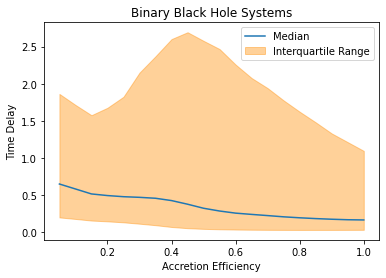

In [112]:
# Accretion Efficiency f_MT, getting the data
df = getData(fmt_inc = True, fmt_index = 'all')
df.columns = ['time_delay','id','Accretion Efficiency']
median = plotMedian(df,'Accretion Efficiency')
median

# Common Envalope Efficiancy

Common Envalope Efficiancy  median_time_delay  lower_quartile  \
0                          0.5           0.134343        0.054608   
1                          1.0           0.583784        0.180367   
2                          2.0           0.705845        0.138888   
3                          3.0           0.797351        0.148789   
4                          4.0           1.049835        0.340919   
5                          5.0           1.544745        0.676501   
6                          6.0           2.209312        1.183806   
7                          7.0           3.250051        1.872388   
8                          8.0           4.400877        2.692199   
9                          9.0           5.756660        3.620135   
10                        10.0           7.002085        4.522978   

    upper_quartile  
0         0.436919  
1         1.714974  
2         3.188483  
3         3.302611  
4         4.080294  
5         4.837788  
6         5.417249  
7         6.428506  
8         7.407405  
9         8.635805  
10        9.857251

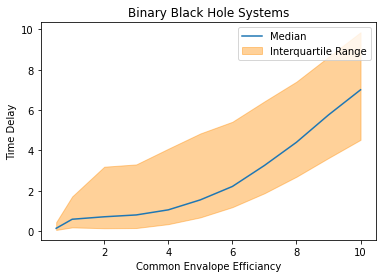

In [113]:
df = getData(alpha_inc = 'True',alpha_index = 'all')
df.columns = ['time_delay','id','Common Envalope Efficiancy']

median = plotMedian(df,'Common Envalope Efficiancy')
median

# Metalicity

Metalicity  median_time_delay  lower_quartile  upper_quartile
0       0.0002           0.285192        0.107645        0.790850
1       0.0004           0.583784        0.180367        1.714974
2       0.0008           0.717906        0.206916        2.135610
3       0.0012           0.740773        0.155590        2.706926
4       0.0016           0.479780        0.074858        2.735871
5       0.0020           0.296308        0.066946        1.965851
6       0.0040           1.284858        0.499447        4.465436
7       0.0060           2.782695        1.232782        6.292701
8       0.0080           5.183762        2.823945        8.655761
9       0.0120           3.756024        0.967919        8.125147
10      0.0160           3.120706        0.725783        7.553036
11      0.0200           3.120706        0.725783        7.553036

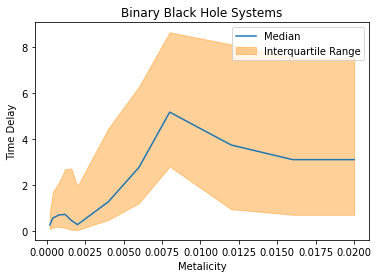

In [114]:
df = getData(Z_inc = True, Z_index = 'all')
df.columns = ['time_delay','id','Metalicity']
plotMedian(df,'Metalicity')